Shape of X_train: (105, 4)
Shape of X_test: (45, 4)
Shape of y_train: (105,)
Shape of y_test: (45,)
accuracy 0.9555555555555556


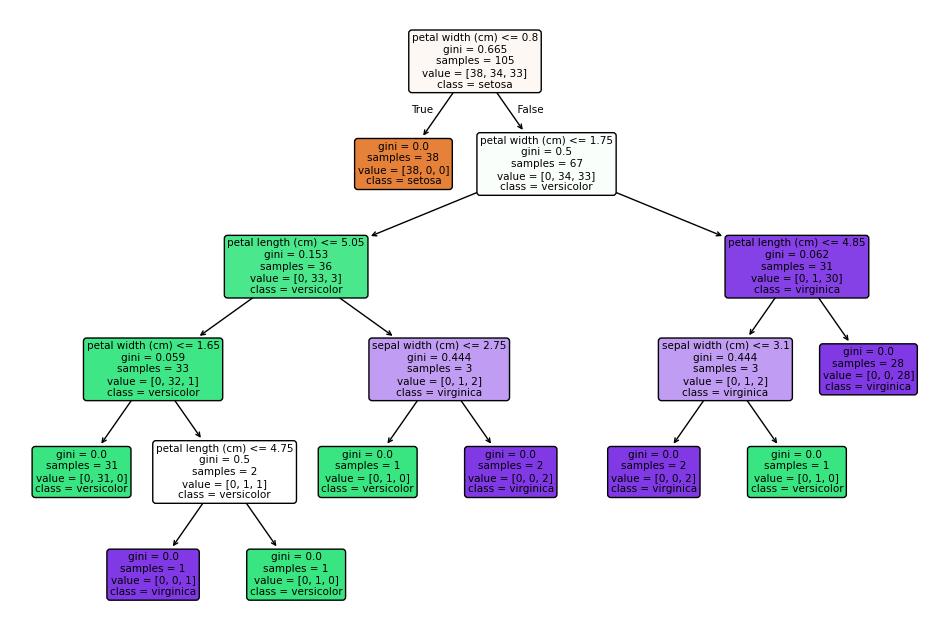

In [1]:
# Basic decision tree classification
# load the datatset using sklearn.datasets.load_iris
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


iris = load_iris() 
x = iris.data
y = iris.target

# split the data into training(70% and testing 30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

print(f"Shape of X_train: {x_train.shape}")
print(f"Shape of X_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# training the decision tree with gini index
decisiontree_gini = DecisionTreeClassifier(criterion='gini'
                                        #    , max_depth=3
                                           )
decisiontree_gini.fit(x_train, y_train)

# evaluate the accuracy on the test set
accuracy_gini = decisiontree_gini.score(x_test, y_test)
print(f"accuracy {accuracy_gini}")

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(decisiontree_gini, 
          feature_names=iris.feature_names,  
          class_names=iris.target_names,
          filled=True, 
          rounded=True)
plt.show()


accuracy 0.9555555555555556


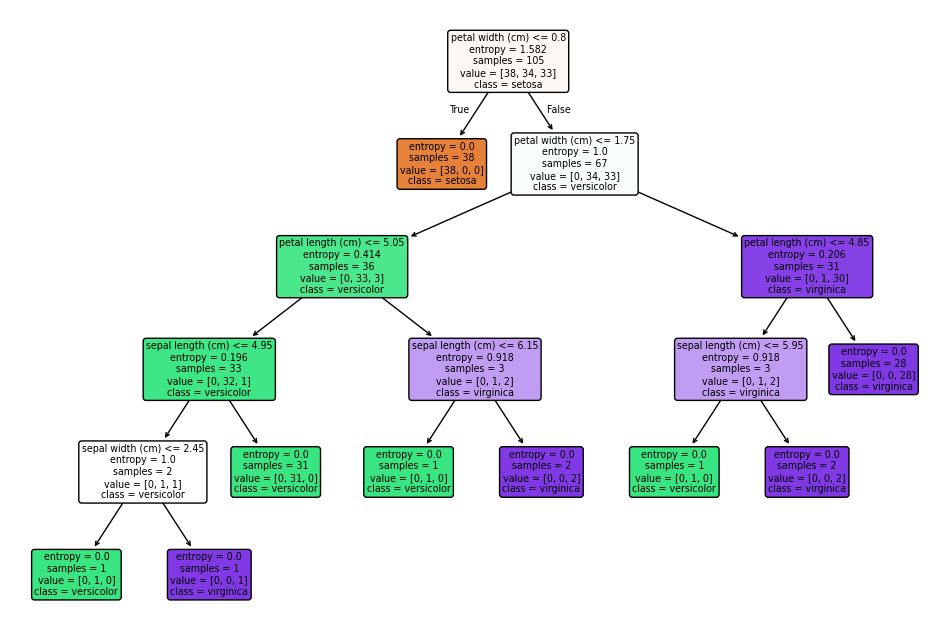

ImportError: cannot import name 'dtreeviz' from 'dtreeviz.trees' (c:\Users\OMEN\AppData\Local\Programs\Python\Python313\Lib\site-packages\dtreeviz\trees.py)

In [ ]:
# train with criterion="entropy" and compare accuracy with gini

decisiontree_entropy = DecisionTreeClassifier(criterion='entropy'
                                            #   , max_depth=3
                                              )
decisiontree_entropy.fit(x_train, y_train)

# evaluate the accuracy on the test set
accuracy_entropy = decisiontree_entropy.score(x_test, y_test)
print(f"accuracy {accuracy_entropy}")

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(decisiontree_entropy, 
          feature_names=iris.feature_names,  
          class_names=iris.target_names,
          filled=True, 
          rounded=True)
plt.show()

from dtreeviz.trees import  

viz = dtreeviz(decisiontree_entropy, x_test, y_test,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

accuracy for dpeth 2 0.9555555555555556


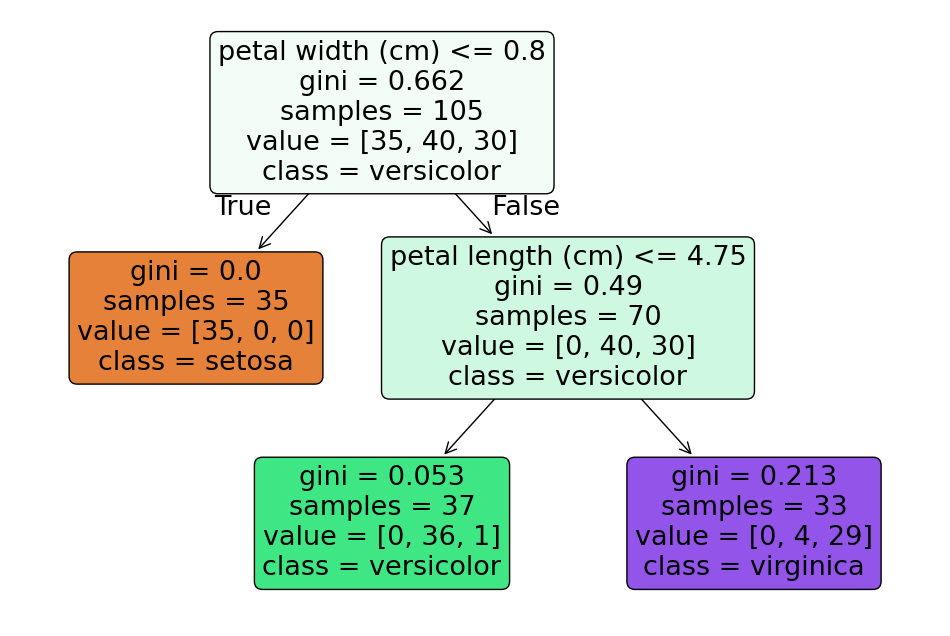

accuracy for dpeth 3 0.9555555555555556


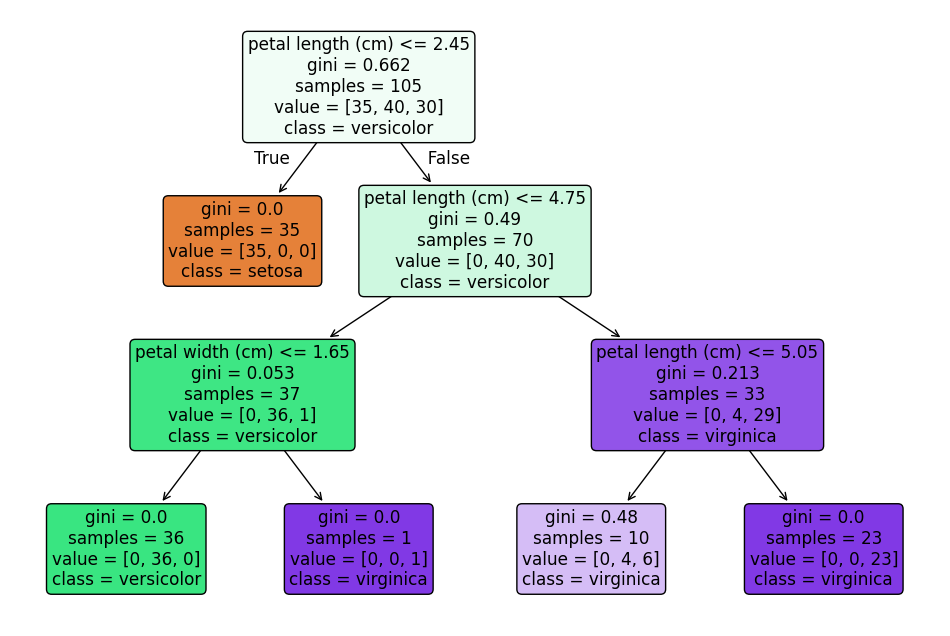

accuracy for dpeth 4 0.9555555555555556


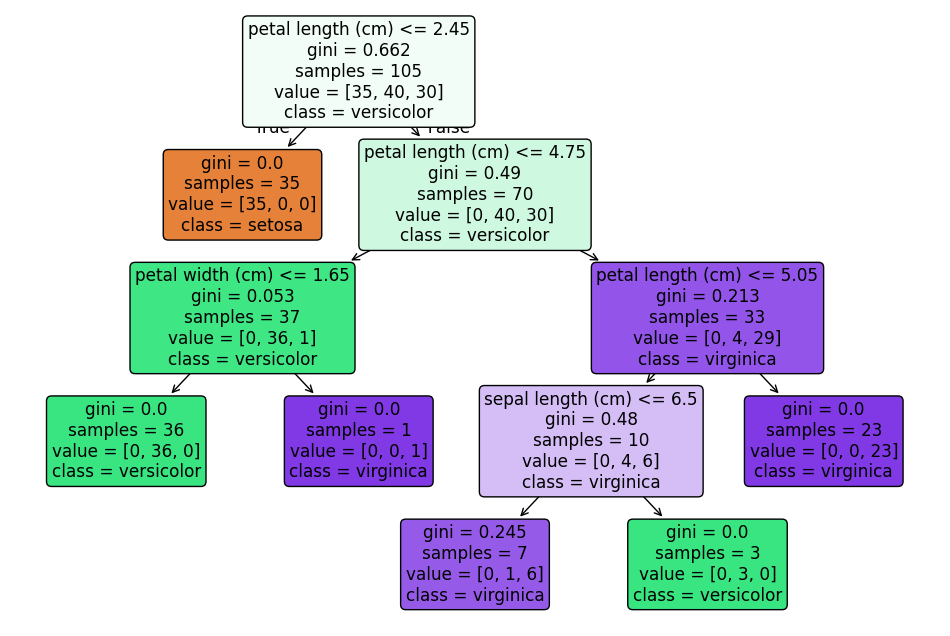

accuracy for dpeth 5 0.9555555555555556


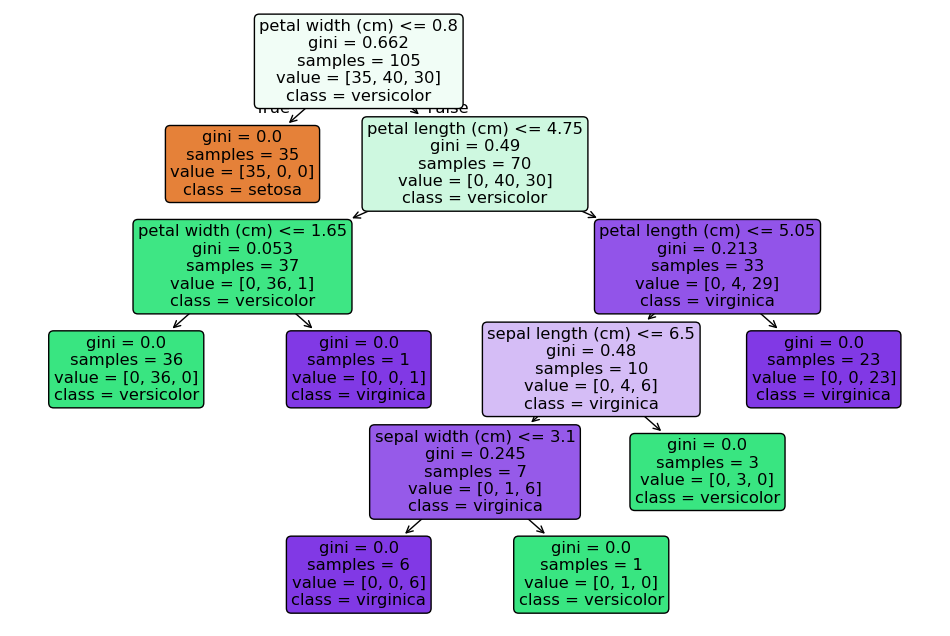

In [ ]:
# effect of the tree depth train with different values of the depth = [2, 3, 4, 5]

for i in range(2, 6):
    # training the decision tree with gini index
    decisiontree_gini_loop = DecisionTreeClassifier(criterion='gini', max_depth=i)
    decisiontree_gini_loop.fit(x_train, y_train)

    # evaluate the accuracy on the test set
    accuracy_gini_loop = decisiontree_gini_loop.score(x_test, y_test)
    print(f"accuracy for dpeth {i} {accuracy_gini_loop}")

    # Plot the decision tree
    plt.figure(figsize=(12, 8))
    plot_tree(decisiontree_gini_loop, 
            feature_names=iris.feature_names,  
            class_names=iris.target_names,
            filled=True, 
            rounded=True)
    plt.show()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Model fitted
Coefficients: [ 0.76060186 -0.62133903  1.42385913]
Intercept: -0.4713280849957142
Predictions: [6.06341582 5.8407779  5.03331923 1.82206735 2.09291289]
MSE: 0.1135
R²: 0.9633


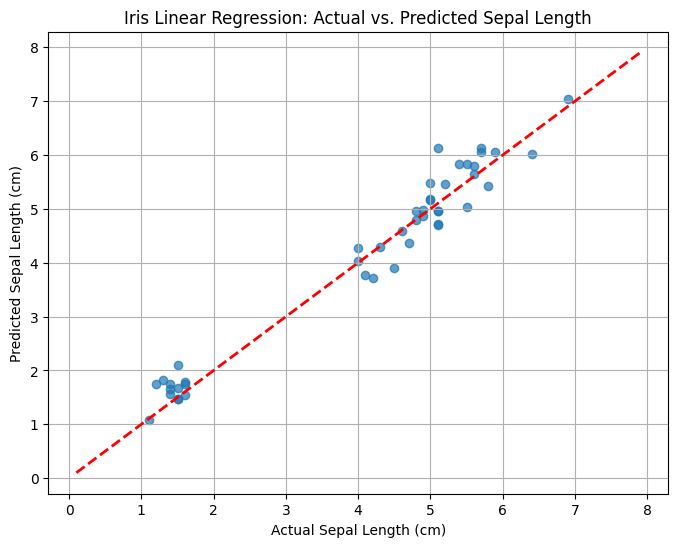

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# decision tree gregression
print(iris.feature_names)

iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

x_linear = iris_data[['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']]
y_linear = iris_data['petal length (cm)']

x_linear_train, x_linear_test, y_linear_train, y_linear_test = train_test_split(x_linear, y_linear, test_size=0.30)

model = LinearRegression()
model.fit(x_linear_train, y_linear_train)
print('Model fitted')

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

y_linear_pred = model.predict(x_linear_test)
print('Predictions:', y_linear_pred[:5])

mse = mean_squared_error(y_linear_test, y_linear_pred)
r2 = r2_score(y_linear_test, y_linear_pred)
print(f'MSE: {mse:.4f}')
print(f'R²: {r2:.4f}')

# Plotting predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_linear_test, y_linear_pred, alpha=0.7)
plt.plot([x.min(), x.max()], [x.min(), x.max()], 'r--', lw=2)
plt.xlabel("Actual Sepal Length (cm)")
plt.ylabel("Predicted Sepal Length (cm)")
plt.title("Iris Linear Regression: Actual vs. Predicted Sepal Length")
plt.grid(True)
plt.show()